In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import os
import sys
sys.path.insert(0, os.path.abspath('../..'))
import utils
np.random.seed(2) 
torch.manual_seed(2)
%load_ext autoreload
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

In [2]:
lcs = utils.get_data(folder='../../datasets/ZTF_gri', min_length=0, keep_missing=True)


found 3408 for band='r'
found 3408 for band='i'
found 3408 for band='g'


/Users/mattlowery/Desktop/Desko/code/astro/hetast/src/dataset.py:167: RuntimeWarning: divide by zero encountered in true_divide
  lc[:,2] = lc[:,2] / np.std(lc[:,1])


max time:  1687.1758
created union_tp attribute of length 3500
dataset created, lcs.dataset.shape=(3177, 3, 4396, 3)
train size: 2859, valid size: 572, test size: 318


In [10]:
os.getcwd()

'/Users/mattlowery/Desktop/Desko/code/astro/hetast/src/notebooks/preview_datasets'

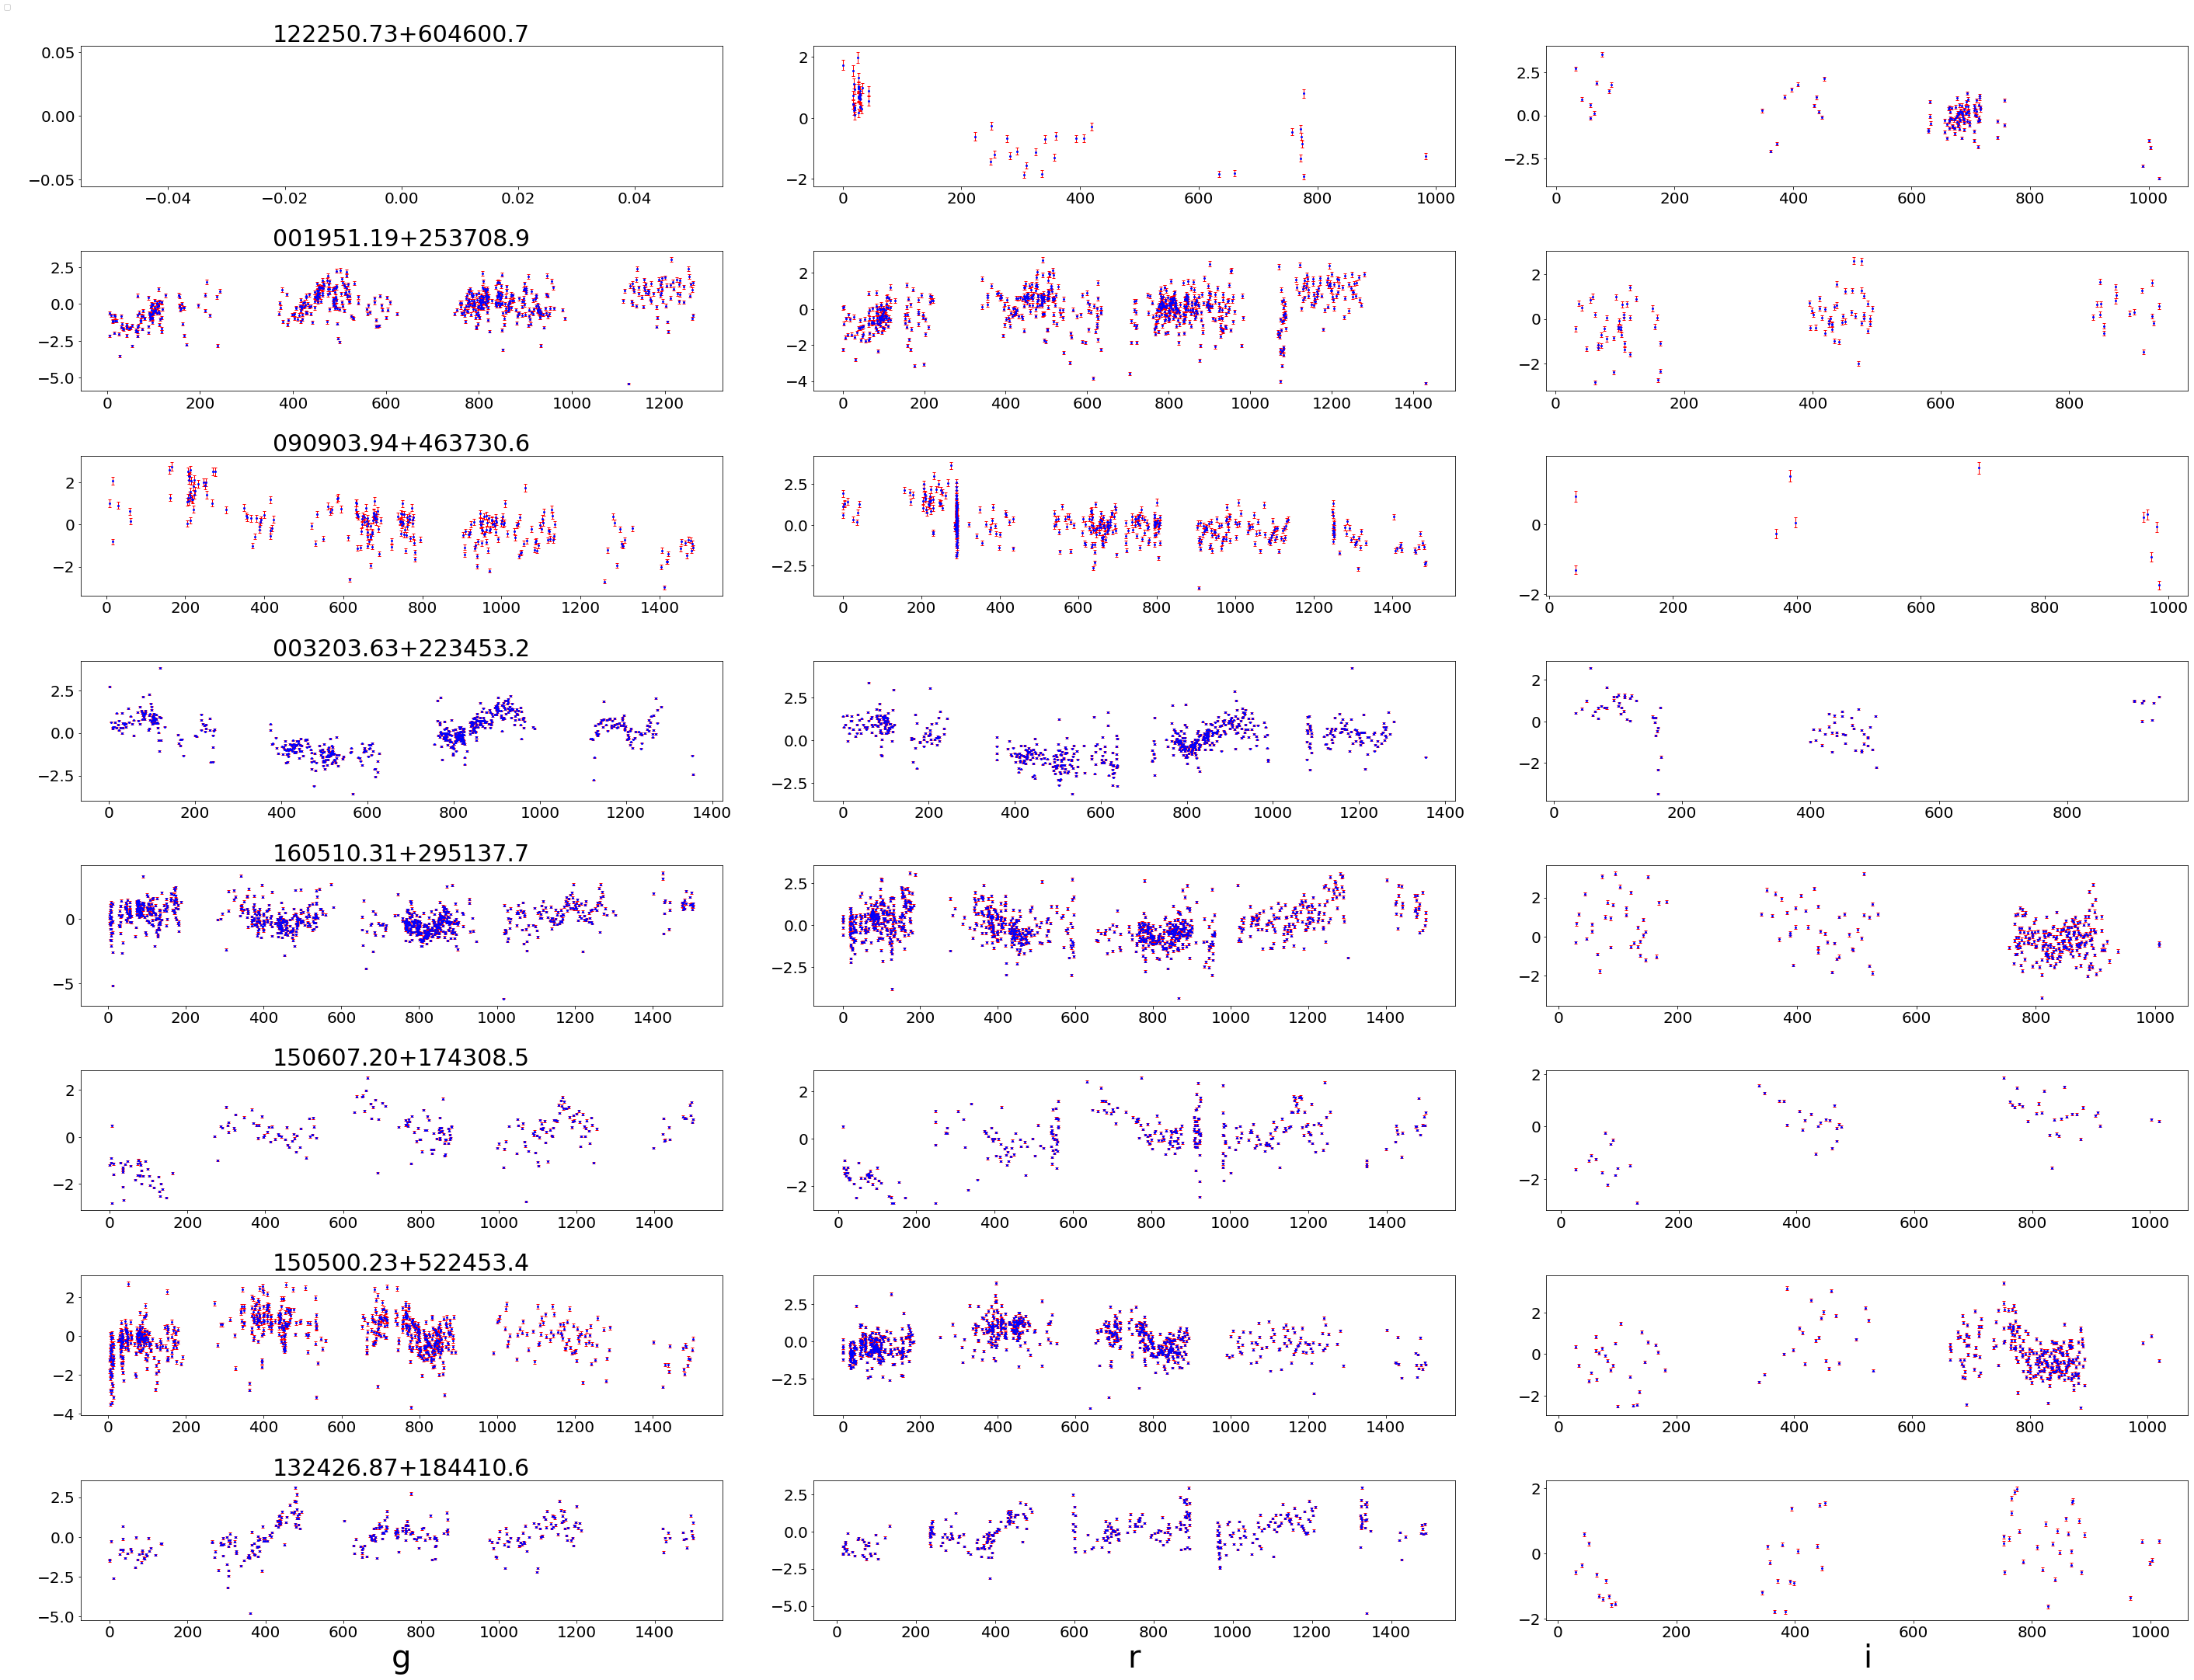

In [11]:
utils.preview_lcs(lcs,[300,540,620,60,120,1023,1050,2000],figsize=[40,30],save=True,filepath='/Users/mattlowery/Desktop/thes/chapters/3/figures/light_curve_prevs')

In [19]:
net,optimizer,scheduler, args, epoch, losses = utils.load_checkpoint(glob.glob('../checkpoints/*')[0], old_g.data_obj)

=> loading checkpoint '../checkpoints/gold1.4479368925094604.h5'
Namespace(data_folder='/home2/fggr82/astr/hetast/src/datasets/gold.pkl', start_col=1, checkpoint=None, seed=2, device='mps', net='HeTVAE', mixing='concat', n_union_tp=3500, embed_time=128, num_heads=16, latent_dim=64, num_ref_points=16, rec_hidden=128, width=512, niters=6000, patience=1000, batch_size=2, k_iwae=1, lr=1e-06, beta1=0.9, beta2=0.999, scheduler=True, warmup=10, factor=0.5, lr_patience=30, threshold=0.01, dropout=0.0, inc_errors=False, frac=0.5, mse_weight=5.0, kl_annealing=True, print_at=1, save_at=1, kl_zero=False, const_var=False, var_per_dim=False, std=0.1, num_resamples=0)


In [27]:
nll,mse,indy = utils.evaluate_hetvae(net,1,lcs.data_obj['train_loader'])
# this one was shuffled according 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1389/1389 [07:20<00:00,  3.15it/s]


In [24]:
lcs = utils.get_data('../../datasets/ZTF_g')

found 3408 for band='g'
max time:  1687.1367
created union_tp attribute of length 3500
dataset created, lcs.dataset.shape=(3087, 1, 1962, 3)
train size: 2778, valid size: 556, test size: 309


In [31]:
np.savetxt('asdfasdf.txt', indy)

In [33]:
np.argwhere(indy != indy)

array([[ 358],
       [1355],
       [2219],
       [2413]])

In [40]:
#lcs.dataset[1355]
lcs.valid_files_df.index[1355]

'141614.28+321823.1'

In [ ]:
152312.86+154654.6'
'141614.28+321823.1'

In [3]:
old_g = utils.load_obj(os.path.expanduser('~/Desktop/gold.pkl'))

In [8]:
old_g.name

'../../datasets/ZTF_g'

In [15]:
import pandas as pd
pd.read_csv('../../datasets/catalogs/rm_sample')['z'].mean()

0.06590404598444094

In [2]:
utils.save_pickle('../../datasets/ZTF_g_test', '../../datasets')

found 49 for band='g'
max time:  1501.0039
created union_tp attribute of length 3500
dataset created, lcs.dataset.shape=(41, 1, 1006, 3)
train size: 36, valid size: 8, test size: 5


In [33]:
%autoreload

In [15]:
lcs = utils.get_data(folder='../../datasets/ZTF_rm', shuffle=False)

found 9 for band='r'
found 10 for band='i'
found 10 for band='g'
found 0 for band='.ipynb_checkpoints'
max time:  1687.1758
created union_tp attribute of length 3500
dataset created, lcs.dataset.shape=(9, 3, 2867, 3)
train size: 8, valid size: 2, test size: 1


In [16]:

def preview_lcs(lcs, indexes=[0,1,2,3], figsize=(15,15), fs=30):
    reorder = [2,0,1]
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    dims = len(lcs.bands)
    fig, ax = plt.subplots(len(indexes), dims, figsize=figsize, squeeze=False)
    fig.tight_layout(pad=5.0)
    c = 0
    for i in indexes:
        obj_name = lcs.valid_files_df.index.values[i]
        ax[c][0].set_title(obj_name,fontsize=fs)
        for band in range(dims):
            t = lcs.dataset[i,reorder[band],:,0]
            y = lcs.dataset[i,reorder[band],:,1]
            yerr = lcs.dataset[i,reorder[band],:,2]
            pts = y.nonzero()[0]
            ax[c][band].errorbar(t[pts],y[pts], yerr=yerr[pts], c='blue', fmt='.', markersize=4, ecolor='red', elinewidth=1, capsize=2)
        c+= 1
    lines_labels = ax[0][0].get_legend_handles_labels()
    lines,labels = lines_labels[0], lines_labels[1]
    fig.legend(lines, labels, loc='upper left')
    [ax[c-1][index].set_xlabel(lcs.bands[reorder[index]],fontsize=fs+10) for index in range(len(lcs.bands))]
    

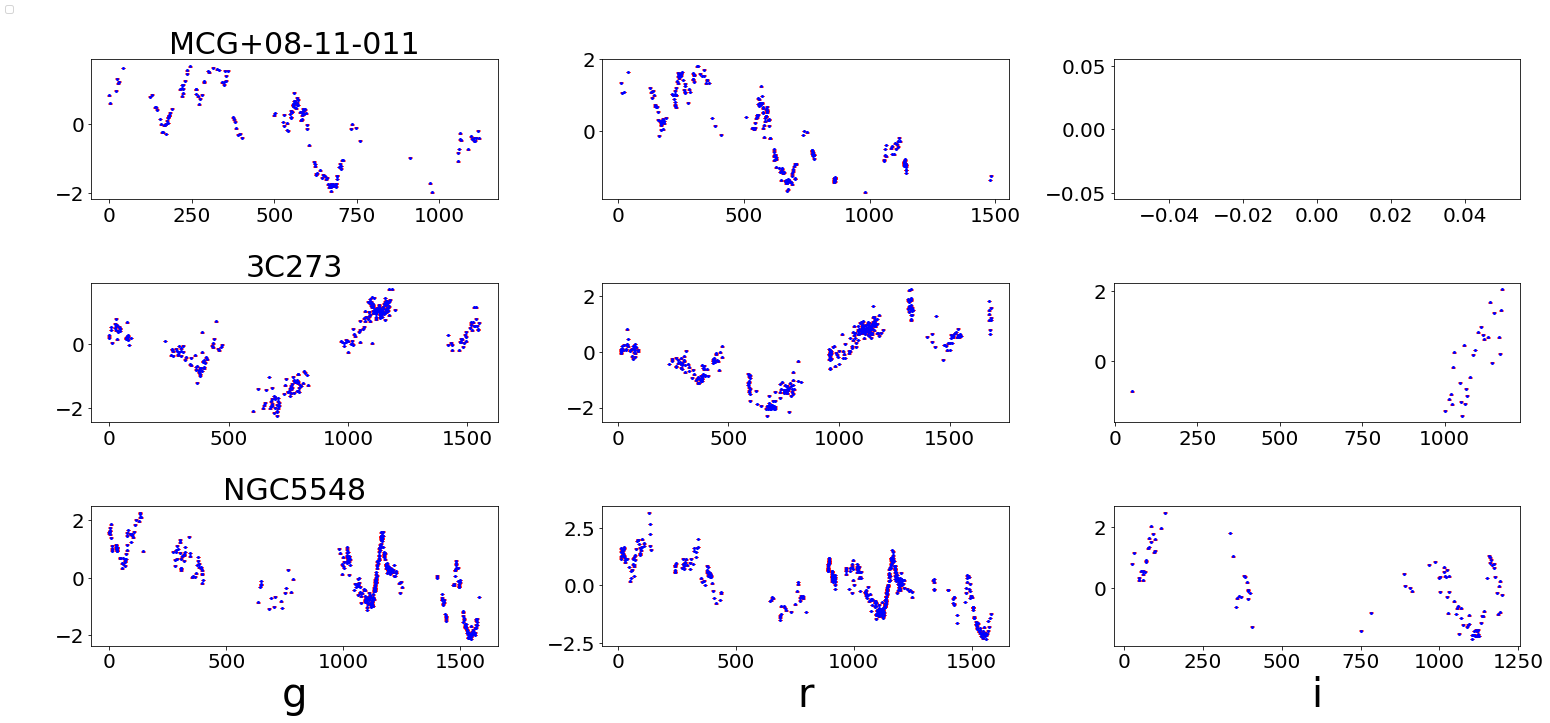

In [18]:
preview_lcs(lcs, indexes=[0,1,4], figsize=(22,10))
plt.savefig('../img/rm_lcs0-9')

In [171]:
pc1bin10 = [557]

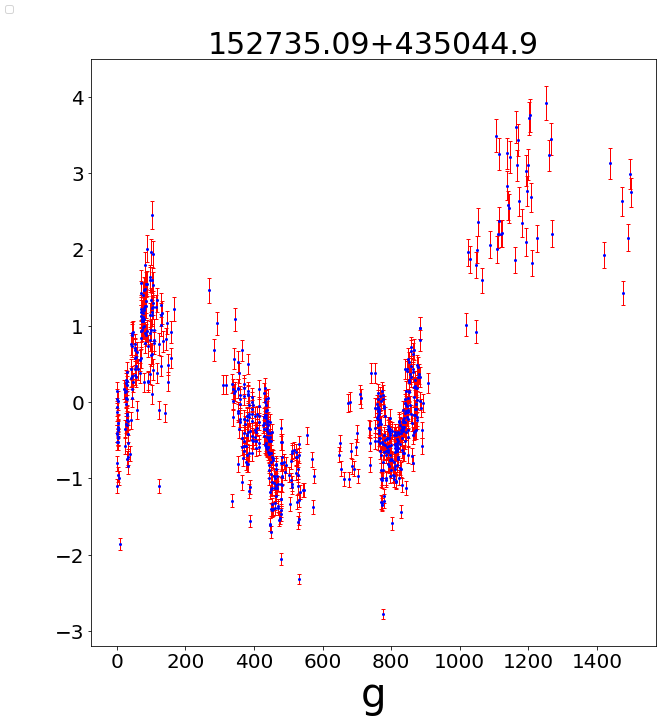

In [53]:
preview_lcs(lcs, indexes=pc1bin10[:4], figsize=(10,10))